In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-day2/cleaned_day2.csv


In [68]:
df = pd.read_csv("/kaggle/input/cleaned-day2/cleaned_day2.csv")

In [69]:
object_list = ['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type']

for col in object_list:
    df[col] = df[col].astype('category')


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
sns.set_theme(style='whitegrid',palette ="pastel")

In [72]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
num_cols

Index(['Age', 'Hypertension', 'Heart_Disease', 'Avg_Glucose_Level', 'BMI',
       'Stroke'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


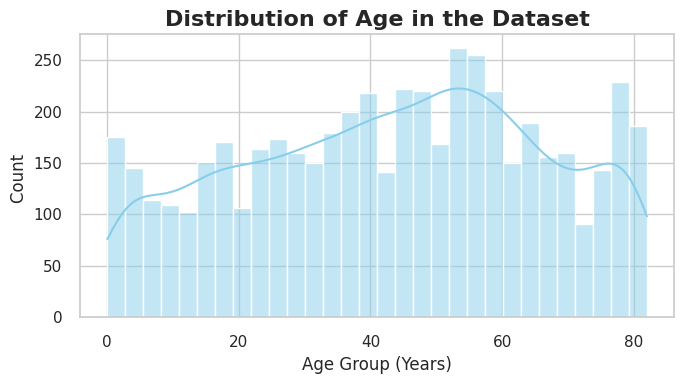

In [120]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,x='Age',bins=30,color='skyblue',kde=True)
plt.title("Distribution of Age in the Dataset",fontsize=16,fontweight='bold')
plt.xlabel("Age Group (Years)",fontsize=12)
plt.ylabel("Count ",fontsize=12)
plt.tight_layout()
plt.savefig('Distribution of Age in the Dataset.png',dpi=500,bbox_inches='tight')


* The age distribution ranges from child to elderly adults, with most patients falling between 30–60 years. The density curve peaks in this range, showing that middle-aged adults are the largest group in the dataset. Younger ages and very old ages appear less frequently. This pattern is useful because stroke risk typically increases with age, making age an important feature for further analysis.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


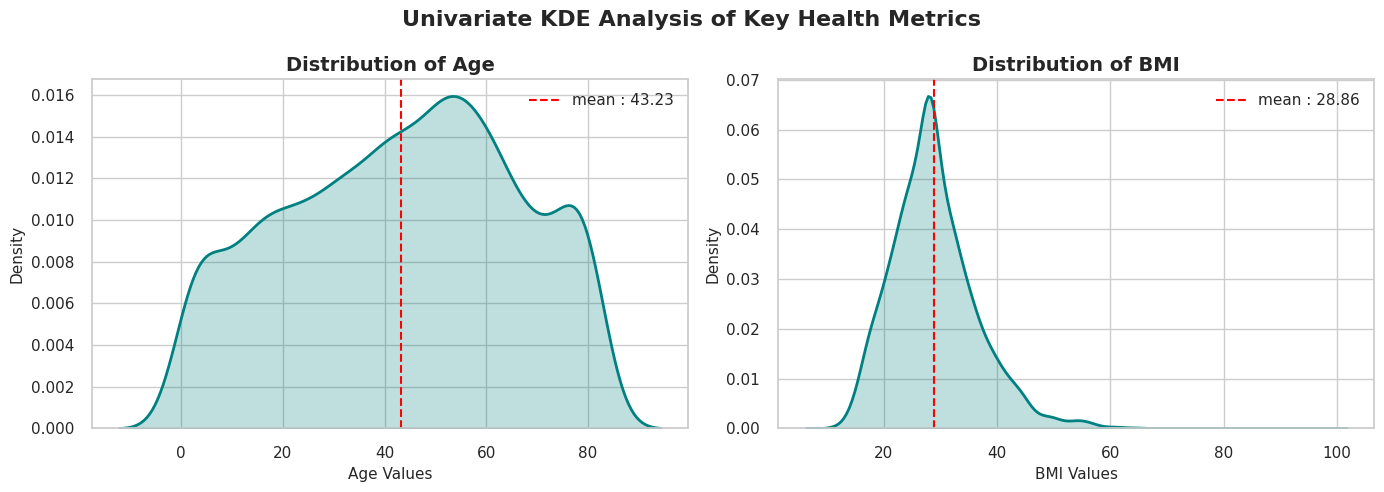

In [121]:

fig, ax = plt.subplots(1,2,figsize=(14, 5))

for i,col in  enumerate (['Age','BMI']):
    sns.kdeplot(data=df,x=col,fill = True,ax=ax[i],color = 'teal',linewidth=2)
    ax[i].set_title(f"Distribution of {col}",fontsize=14,fontweight='bold')
    ax[i].set_xlabel(f"{col} Values", fontsize=11)
    ax[i].set_ylabel("Density",fontsize=11)

    ax[i].axvline(df[col].mean(),color='red',linestyle='--',label=f'mean : {df[col].mean():.2f}')
    ax[i].legend()
plt.suptitle("Univariate KDE Analysis of Key Health Metrics",fontsize=16,fontweight='bold')
plt.tight_layout()
plt.savefig('Univariate KDE Analysis of Key Health Metrics.png',dpi=500,bbox_inches='tight')


Age is widely spread in the dataset, with a higher concentration of individuals between 40 and 60 years. The KDE curve shows that middle-aged adults form the largest portion of the sample. Younger and very old individuals are less represented

BMI values show a right-skewed distribution, with most individuals having BMI between 20 and 35. A few extreme high BMI values create a long tail, but these represent a small minority

Avg_Glucose_Level
count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: Avg_Glucose_Level, dtype: float64
******************************
BMI
count    5109.000000
mean       28.863300
std         7.699785
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: BMI, dtype: float64
******************************


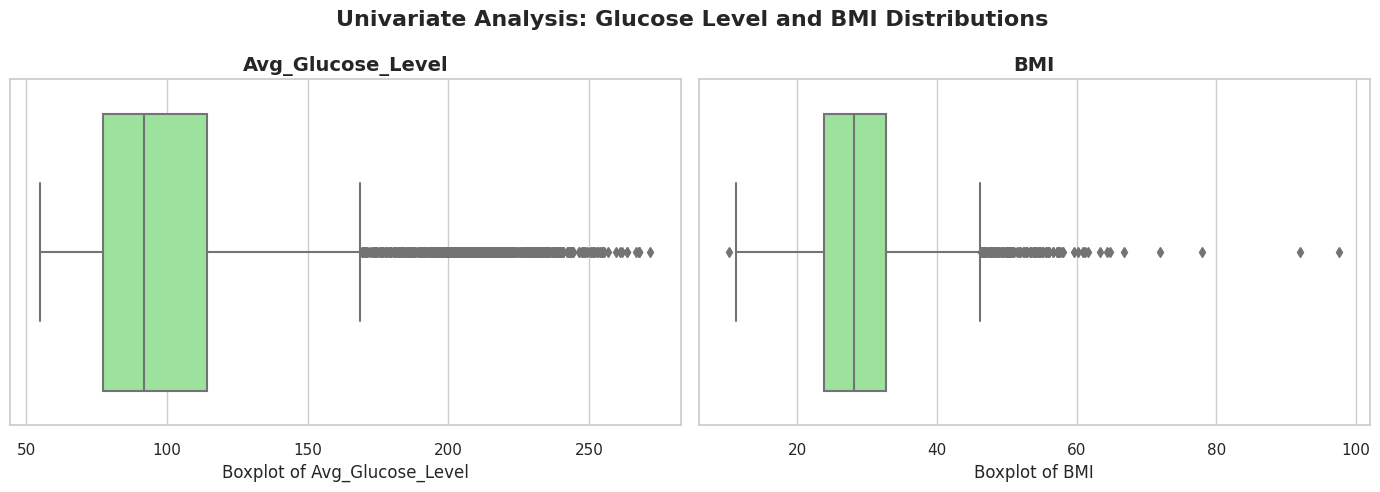

In [122]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
for i, col in enumerate (['Avg_Glucose_Level','BMI']):
    sns.boxplot(data =df,x=col,ax = ax[i],color = 'lightgreen')
    ax[i].set_title(f"{col}",fontsize=14,fontweight='bold')
    ax[i].set_xlabel(f"Boxplot of {col}")
    plt.suptitle("Univariate Analysis: Glucose Level and BMI Distributions",fontsize=16,fontweight='bold')
plt.tight_layout()
plt.savefig('Univariate Analysis: Glucose Level and BMI Distributions.png',dpi=500,bbox_inches='tight')

for col in ['Avg_Glucose_Level','BMI']:
    print(col)
    print(df[col].describe())
    print('*'*30)
    

### Avg_Glucose_Level
The dataset contains many patients with elevated or very high glucose levels, which is medically relevant since high glucose is linked to stroke and other health issues.

These outliers are realistic, not data errors → should keep them for analysis.

### BMI
The BMI distribution naturally contains high values—some people do have extremely high BMI.

They are not “wrong” values → analyze them instead of removing.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


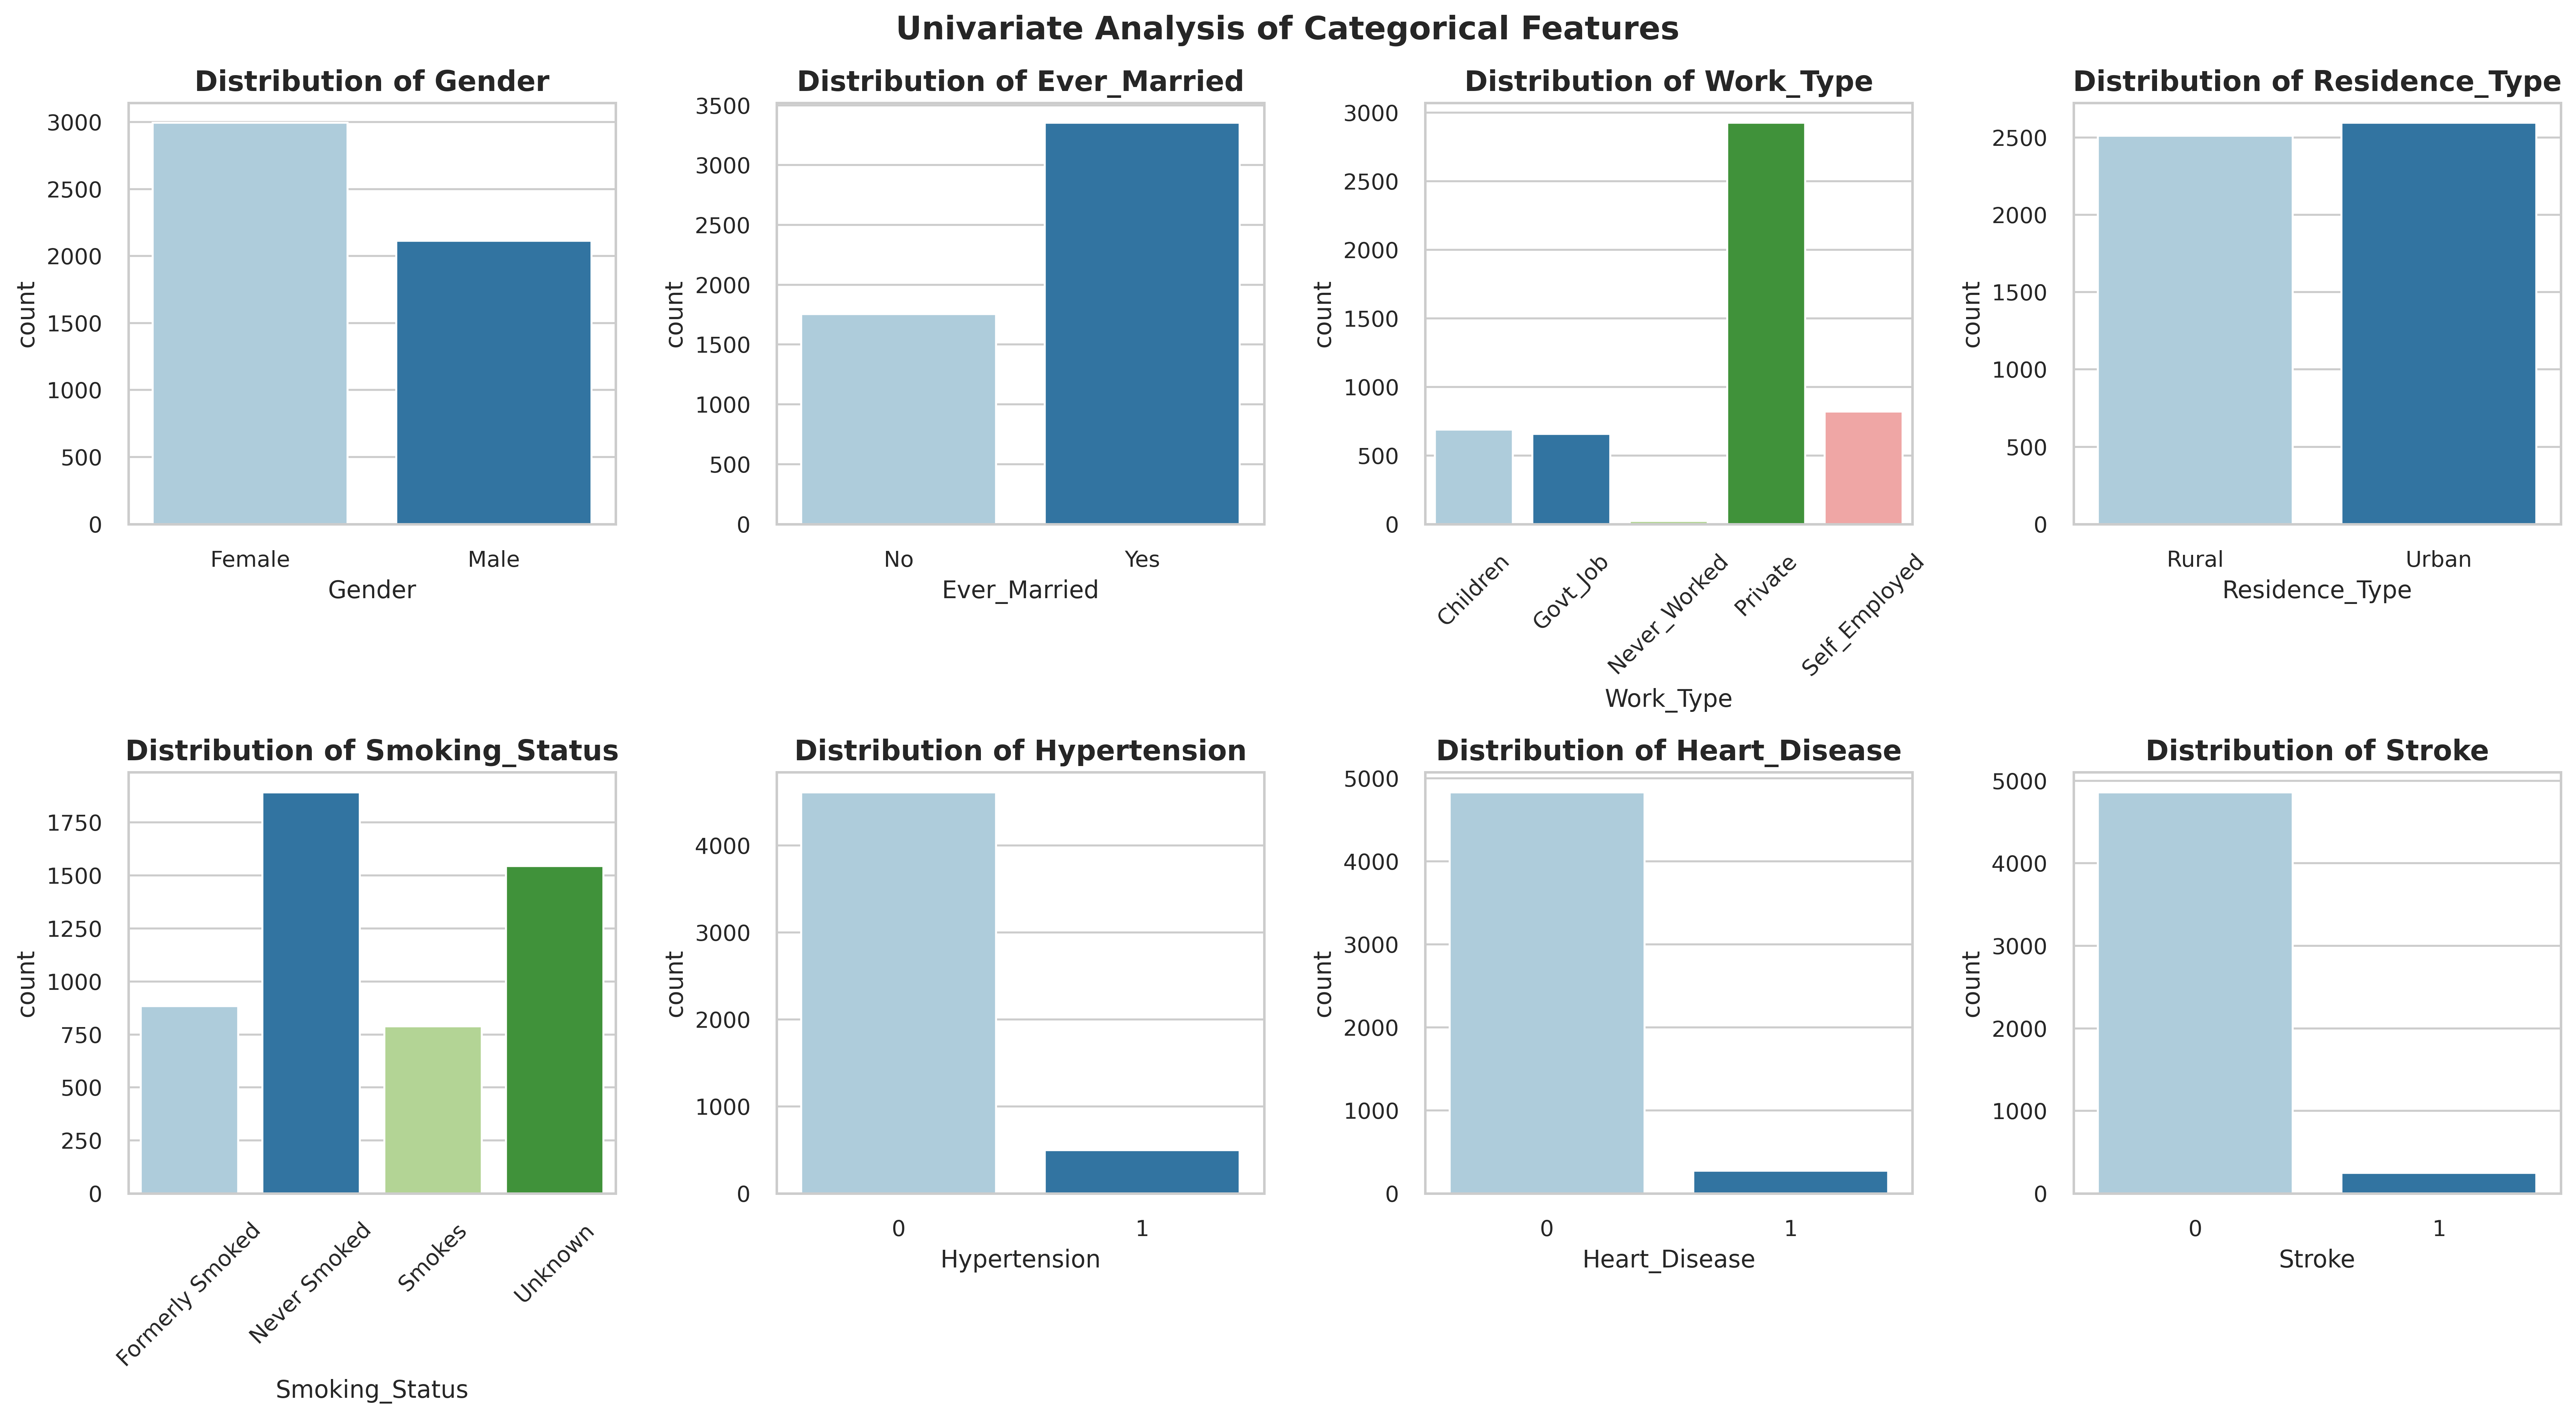

In [123]:
categorical_columns = ['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type', 'Smoking_Status', 'Hypertension', 'Heart_Disease', 'Stroke']
fig, ax = plt.subplots(2,4,figsize=(18,10),dpi=400)
ax_flat = ax.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df,x=col,ax =ax_flat[i] ,palette ='Paired')
    ax_flat[i].set_title(f"Distribution of {col}",fontsize = 14,fontweight='bold')

    if col in ['Work_Type', 'Smoking_Status']:
        ax_flat[i].tick_params(axis='x',rotation=45)

plt.suptitle("Univariate Analysis of Categorical Features",fontsize=16,fontweight='bold')
plt.tight_layout()
plt.savefig('Univariate Analysis of Categorical Features.png',dpi=500,bbox_inches='tight')

### 📊 Interpretation of Categorical Features

* **Target Variable (Stroke):** The dataset is **highly imbalanced**, with very few stroke cases (~5%) compared to non-stroke cases.
* **Health Conditions:** Both `Hypertension` and `Heart_Disease` are relatively rare in this population (most values are 0).
* **Demographics:**
    * There are more **Females** than Males.
    * The majority of participants have **been married** (`Ever_Married` = Yes).
    * **Residence Type** is evenly split between Urban and Rural.
* **Lifestyle:**
    * **Work Type:** The dominant category is **Private** sector employment.
    * **Smoking Status:** "Never Smoked" is the most common status, but there is a significant number of **"Unknown"** values (approx 30%).
      

In [77]:
df['Work_Type'].value_counts()

Work_Type
Private          2924
Self_Employed     819
Children          687
Govt_Job          657
Never_Worked       22
Name: count, dtype: int64

In [78]:
for col in categorical_columns:
    print(f"-----{col}-----")
    print(df[col].value_counts())

-----Gender-----
Gender
Female    2994
Male      2115
Name: count, dtype: int64
-----Ever_Married-----
Ever_Married
Yes    3353
No     1756
Name: count, dtype: int64
-----Work_Type-----
Work_Type
Private          2924
Self_Employed     819
Children          687
Govt_Job          657
Never_Worked       22
Name: count, dtype: int64
-----Residence_Type-----
Residence_Type
Urban    2596
Rural    2513
Name: count, dtype: int64
-----Smoking_Status-----
Smoking_Status
Never Smoked       1892
Unknown            1544
Formerly Smoked     884
Smokes              789
Name: count, dtype: int64
-----Hypertension-----
Hypertension
0    4611
1     498
Name: count, dtype: int64
-----Heart_Disease-----
Heart_Disease
0    4833
1     276
Name: count, dtype: int64
-----Stroke-----
Stroke
0    4860
1     249
Name: count, dtype: int64


In [79]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Age', 'Hypertension', 'Heart_Disease', 'Avg_Glucose_Level', 'BMI',
       'Stroke'],
      dtype='object')

The correlation coefficient between Age and BMI is: 0.3242


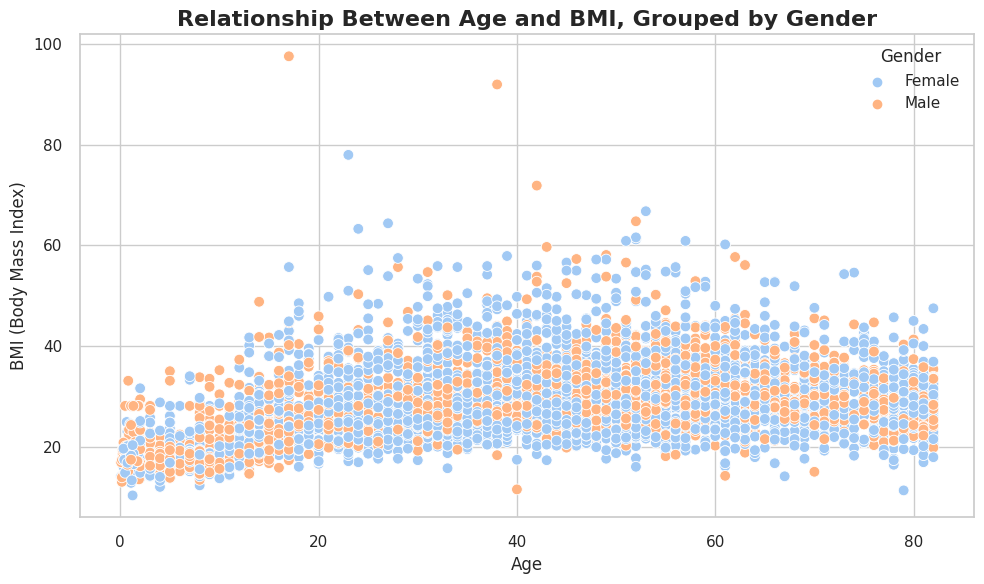

In [124]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age',y='BMI',hue='Gender',s=60 )
plt.title('Relationship Between Age and BMI, Grouped by Gender',
         fontsize=16,
         fontweight='bold')
plt.ylabel("BMI (Body Mass Index)",fontsize=12)
plt.tight_layout()

age_BMI_corr = df['Age'].corr(df['BMI'])
print(f"The correlation coefficient between Age and BMI is: {age_BMI_corr:.4f}")
plt.savefig('Relationship Between Age and BMI, Grouped by Gender.png',dpi=500,bbox_inches='tight')

There is a weak positive relationship between Age and BMI — as people get older, BMI increases slightly.
The correlation is low (0.32), meaning age is not a strong predictor of BMI.
Both males and females follow a similar pattern, with no major gender differences.

The correlation coefficient between Age and Avg_Glucose_Level is: 0.3242


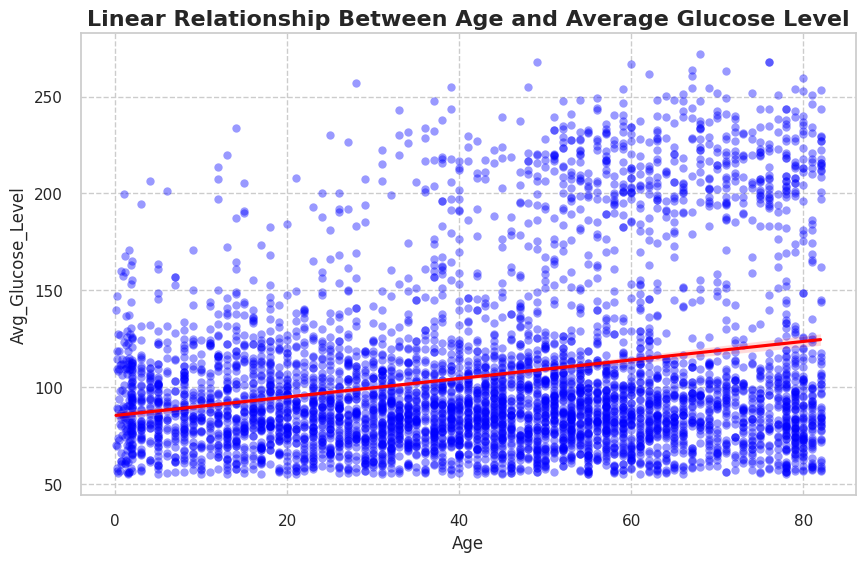

In [125]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='Age',y='Avg_Glucose_Level',
           scatter_kws={'color':'blue','alpha':.4},
           line_kws={'color':'red'})
plt.title("Linear Relationship Between Age and Average Glucose Level",
          fontsize=16, 
          fontweight='bold')
plt.grid(linestyle='--')

age_AGL_corr = df['Age'].corr(df['Avg_Glucose_Level'])
print(f"The correlation coefficient between Age and Avg_Glucose_Level is: {age_BMI_corr:.4f}")
plt.savefig('Linear Relationship Between Age and Average Glucose Level.png',dpi=500,bbox_inches='tight')

### Relationship Between Age and Average Glucose Level

The scatterplot shows a slight upward trend—as age increases, average glucose levels tend to rise.
The red regression line confirms this weak positive relationship.

The correlation is 0.2383, which means:

The relationship is positive but weak

Older individuals generally show slightly higher glucose levels

The pattern is real but not strong enough to make strong predictions

Overall, age has some influence, but many other factors also affect glucose level.

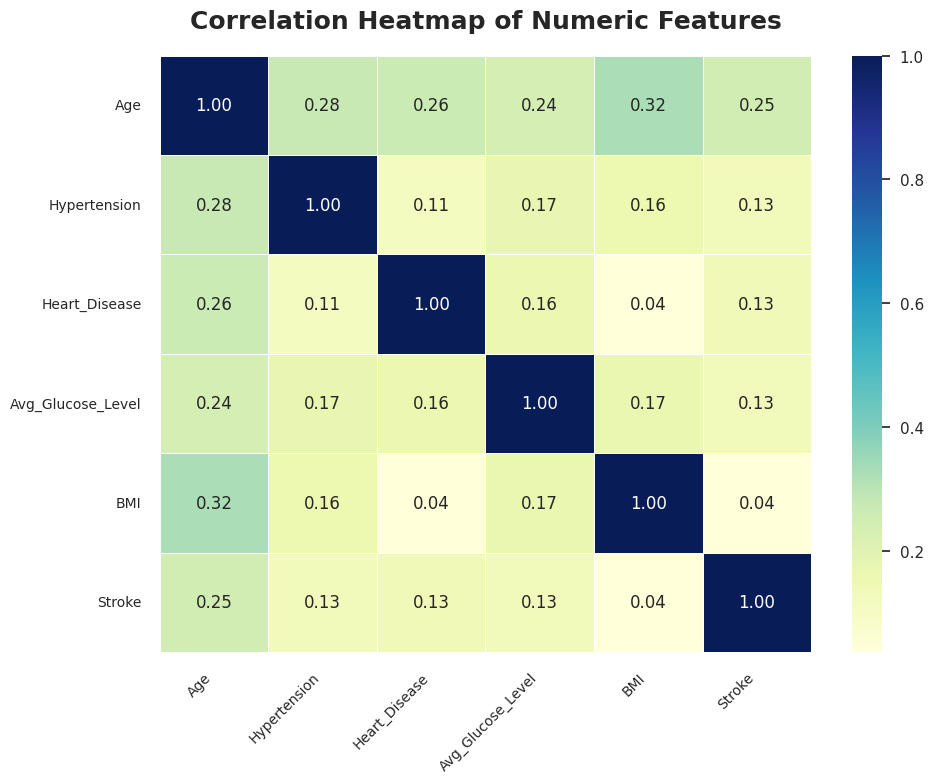

In [126]:
numeric_df = df[['Age', 'Hypertension', 'Heart_Disease', 'Avg_Glucose_Level', 'BMI', 'Stroke']]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix , 
           annot =True,
           cmap='YlGnBu',
           fmt ='.2f',
           linewidth=.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('Correlation Heatmap of Numeric Features.png',dpi=500,bbox_inches='tight')

All numeric relationships in the dataset are weak, meaning no variable strongly predicts stroke on its own.

Age shows the highest correlations, but still weak (<0.35).

Stroke is influenced by multiple small factors, not one strong factor.

Because stroke cases are rare, correlations appear small even if relationships exist.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             5109 non-null   category
 1   Age                5109 non-null   float64 
 2   Hypertension       5109 non-null   int64   
 3   Heart_Disease      5109 non-null   int64   
 4   Ever_Married       5109 non-null   category
 5   Work_Type          5109 non-null   category
 6   Residence_Type     5109 non-null   category
 7   Avg_Glucose_Level  5109 non-null   float64 
 8   BMI                5109 non-null   float64 
 9   Smoking_Status     5109 non-null   object  
 10  Stroke             5109 non-null   int64   
dtypes: category(4), float64(3), int64(3), object(1)
memory usage: 300.1+ KB


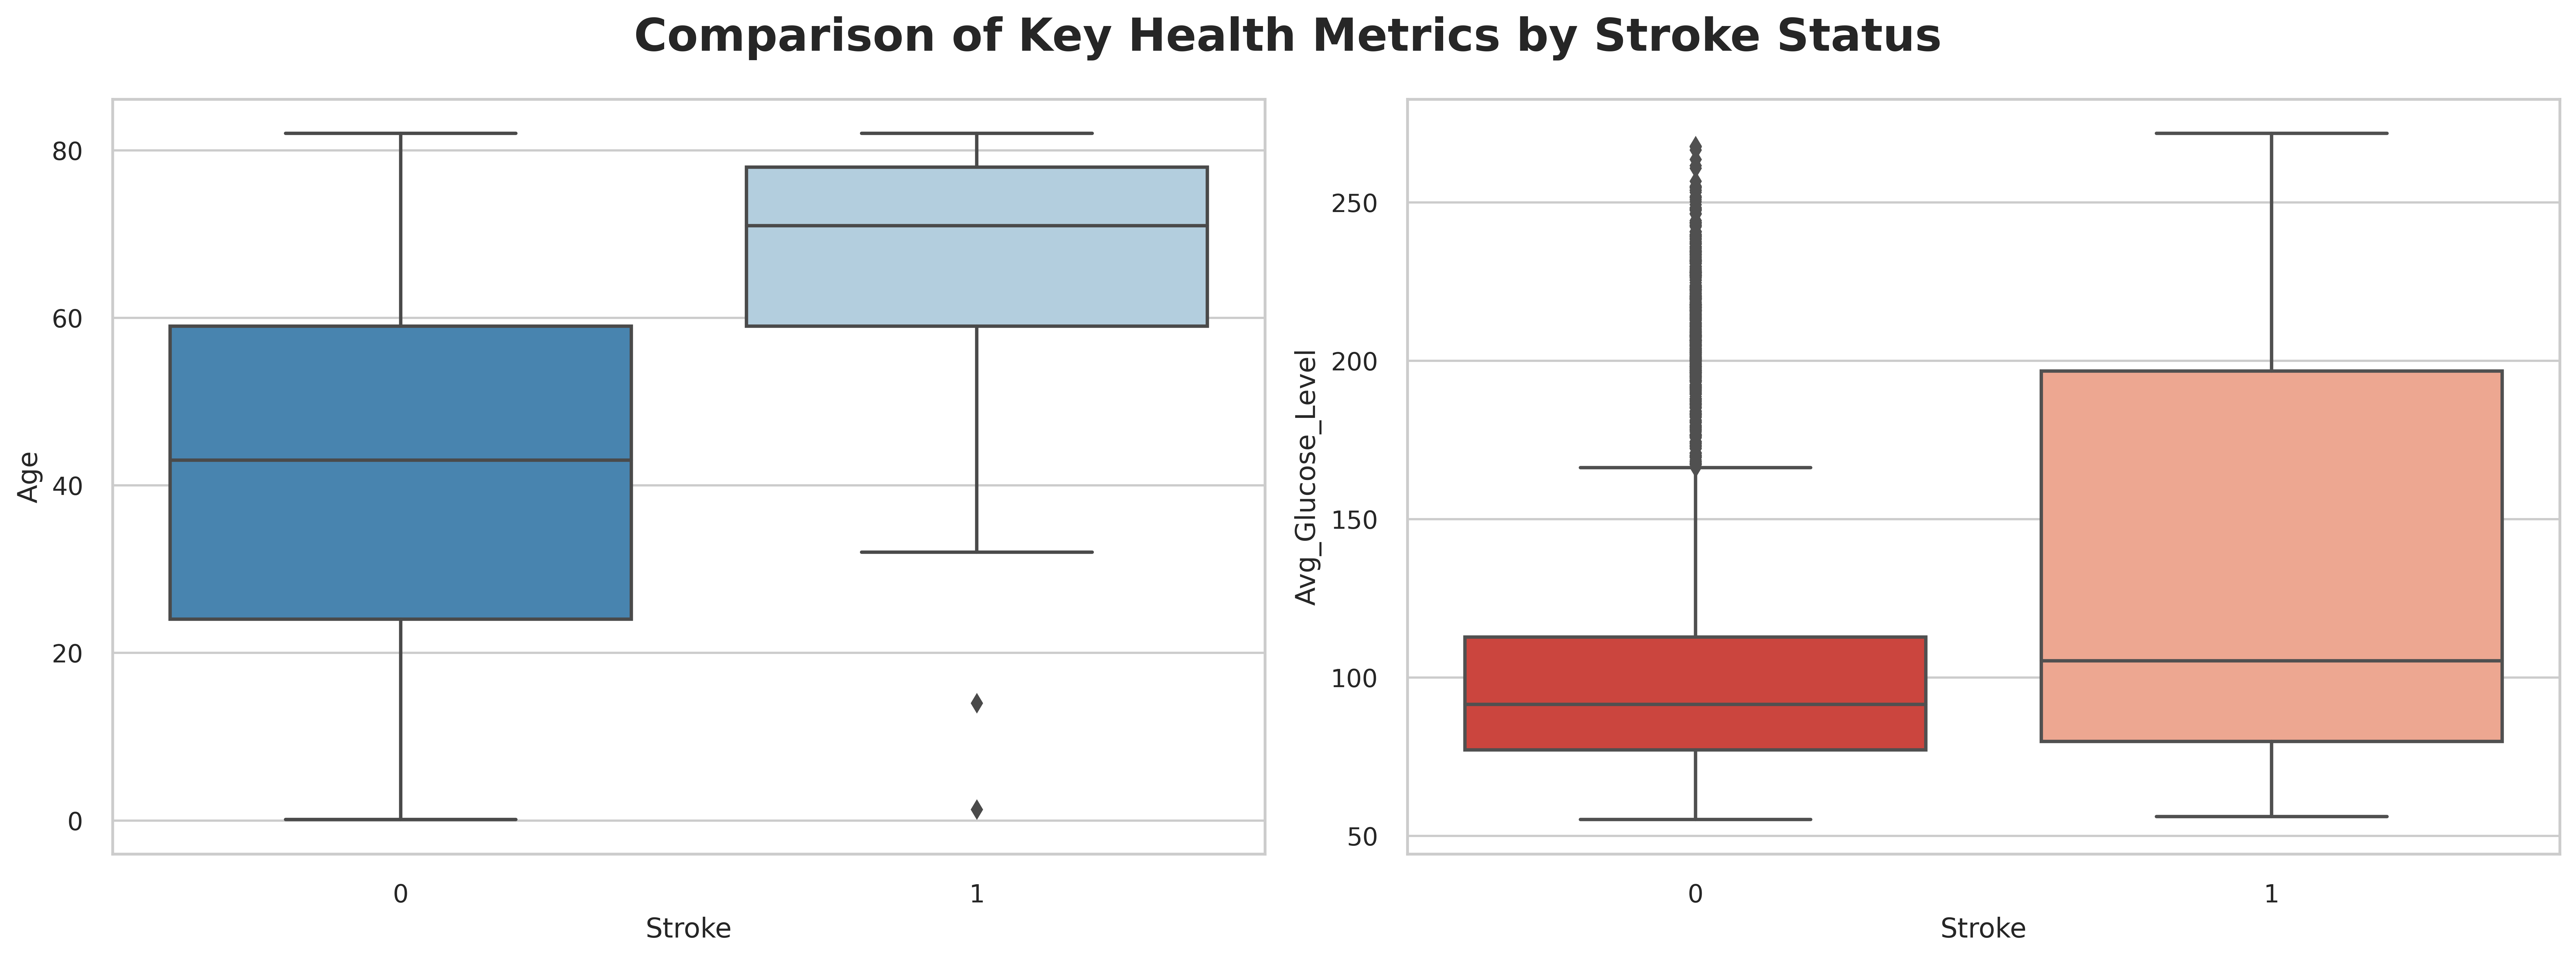

In [127]:
fig, ax = plt.subplots(1,2,figsize=(16,6),dpi=500)

plt.suptitle('Comparison of Key Health Metrics by Stroke Status',fontsize=20,fontweight='bold')

sns.boxplot(data=df,y='Age',x='Stroke',palette='Blues_r',ax=ax[0])
axes[0].set_title('Age Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Stroke Status', fontsize=12)
axes[0].set_ylabel('Age (Years)', fontsize=12)
axes[0].set(xticks=[0, 1], xticklabels=['No Stroke', 'Stroke'])
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.boxplot(data=df,y='Avg_Glucose_Level',x='Stroke',palette='Reds_r',ax=ax[1])
axes[1].set_title("Average Glucose Level", fontsize=16, fontweight='bold')
axes[1].set_xlabel('Stroke Status', fontsize=12)
axes[1].set_ylabel('Average Glucose Level (mg/dL)', fontsize=12) 
axes[1].set(xticks=[0, 1], xticklabels=['No Stroke', 'Stroke'])
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Comparison of Key Health Metrics by Stroke Status.png',dpi=500,bbox_inches='tight')


### Age Distribution by Stroke Status
People who experienced a stroke tend to be much older.

The median age for stroke cases is significantly higher than for non-stroke cases.

The lower and upper quartiles for the stroke group also show that most stroke patients fall in an older age range.

Non-stroke cases include a much wider age range, including many young adults and even children.

A few outliers appear at the very low age range for stroke cases, but these are extremely rare.

### Average Glucose Level by Stroke Status
The median glucose level for stroke patients is higher than for non-stroke individuals.

The interquartile range for stroke cases is shifted upward.

Stroke patients show a wider spread in glucose levels, indicating greater variability.

The non-stroke group has many extreme high outliers, but their central distribution remains lower.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


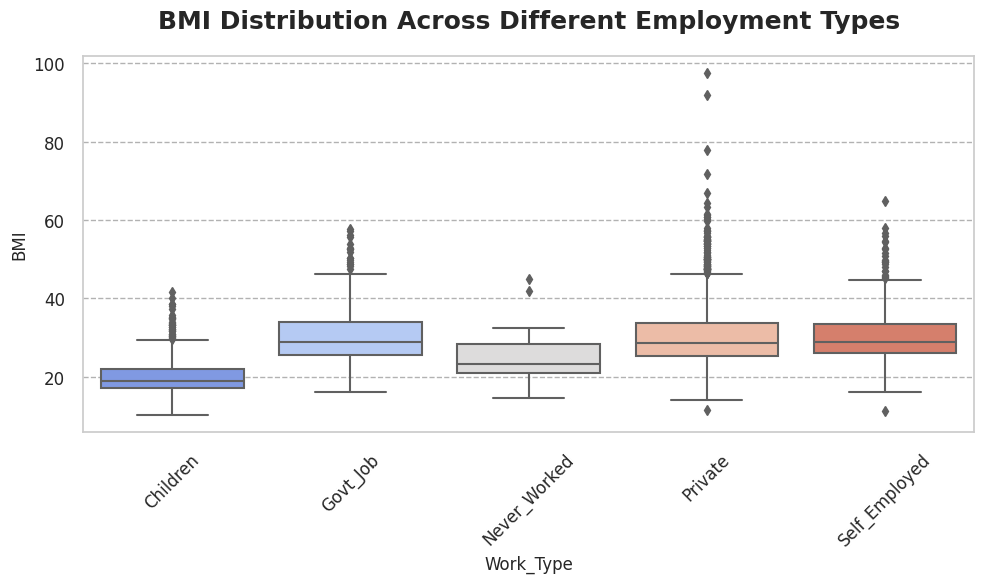

In [128]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Work_Type', y='BMI', data=df,palette ='coolwarm')
plt.title('BMI Distribution Across Different Employment Types',fontsize=18,fontweight='bold',pad=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--',color='black', alpha=0.3)

plt.tight_layout()
plt.savefig('BMI Distribution Across Different Employment Types.png',dpi=500,bbox_inches='tight')

### BMI Distribution Across Different Employment Types
Children have predictably low BMI.

Govt Job and Private workers tend to have higher median BMI.

Private and Self Employed categories show the widest variability, reflecting different lifestyles.

Outliers are significant, suggesting that BMI can vary greatly within employment types.
Work type appears to influence BMI, with adults in more sedentary or stressful jobs showing higher BMI distributions.

Work type appears to influence BMI, with adults in more sedentary or stressful jobs showing higher BMI distributions.

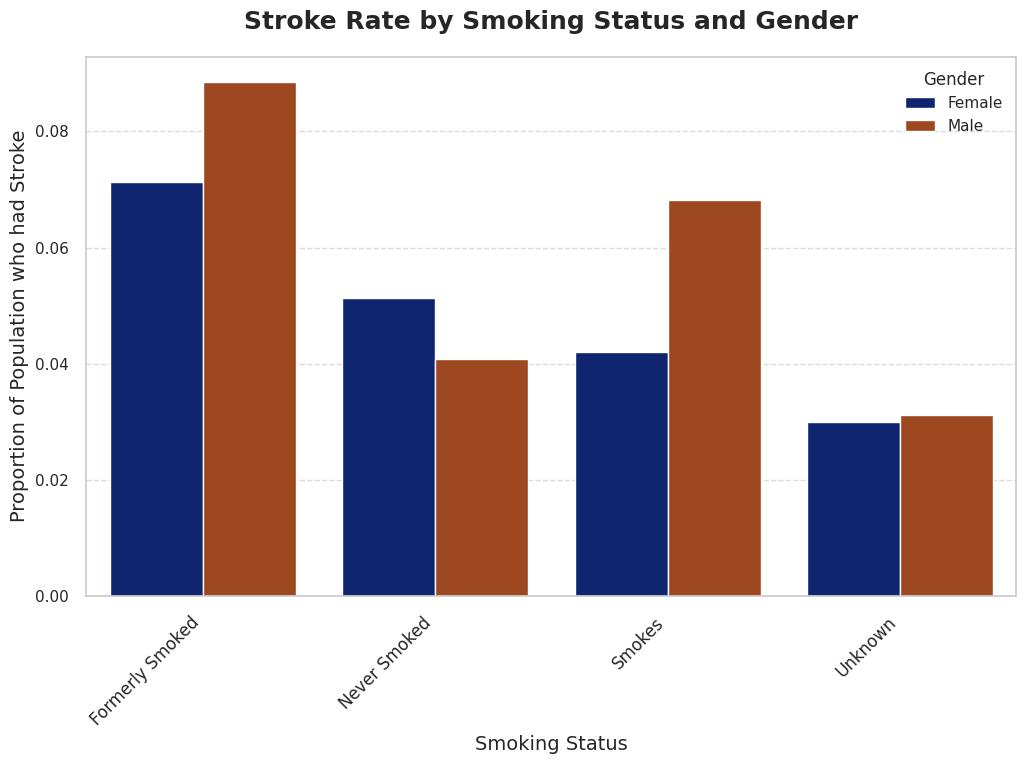

In [129]:
plt.figure(figsize=(12, 7))

sns.barplot(data=df, x='Smoking_Status',y='Stroke',hue='Gender',palette='dark',errorbar=None)
plt.title('Stroke Rate by Smoking Status and Gender',fontsize=18,fontweight='bold',pad=20)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Proportion of Population who had Stroke', fontsize=14) 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Stroke Rate by Smoking Status and Gender.png',dpi=500,bbox_inches='tight')

Males consistently have higher stroke rates than females in every smoking category except “Never Smoked,” where females are slightly higher.

Former smokers (especially males) show the highest stroke risk overall.

Current smokers also show elevated stroke rates, again higher in males.

Never-smoked groups have lower stroke rates, confirming smoking as a risk factor.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


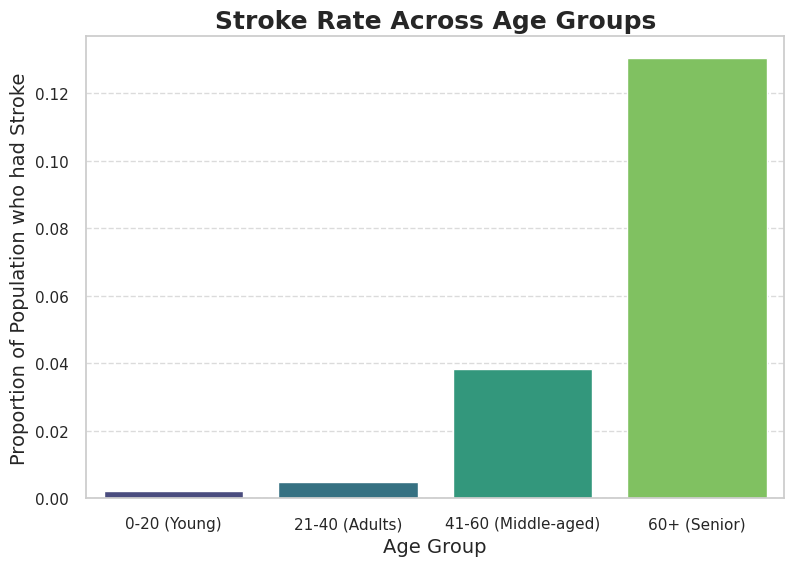

In [130]:
age_bins = [0 , 20, 40, 60,df['Age'].max()]
age_labels = ['0-20 (Young)', '21-40 (Adults)', '41-60 (Middle-aged)', '60+ (Senior)']

df['Age_Group'] = pd.cut(df['Age'],bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(9, 6))
sns.barplot(data=df,x='Age_Group',y='Stroke',palette='viridis',errorbar=None)
plt.title('Stroke Rate Across Age Groups', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Proportion of Population who had Stroke', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Stroke Rate Across Age Groups.png',dpi=500,bbox_inches='tight')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


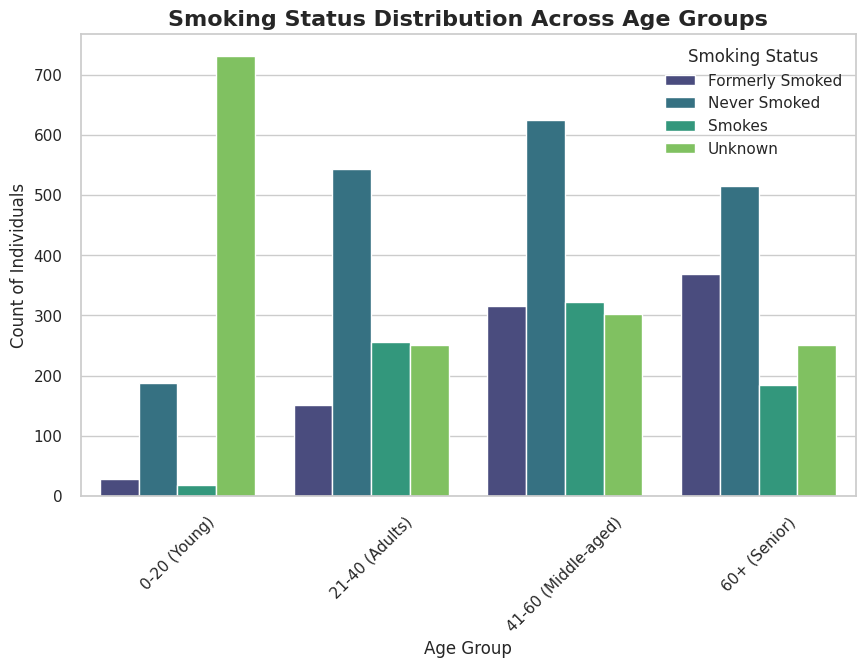

In [131]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Group', hue='Smoking_Status',palette='viridis')
plt.title('Smoking Status Distribution Across Age Groups', fontsize=16, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Smoking Status')
plt.savefig('Smoking Status Distribution Across Age Groups.png',dpi=500,bbox_inches='tight')


Smoking behavior changes with age: younger people rarely smoke, middle-aged people smoke the most, and seniors have the highest number of former smokers.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


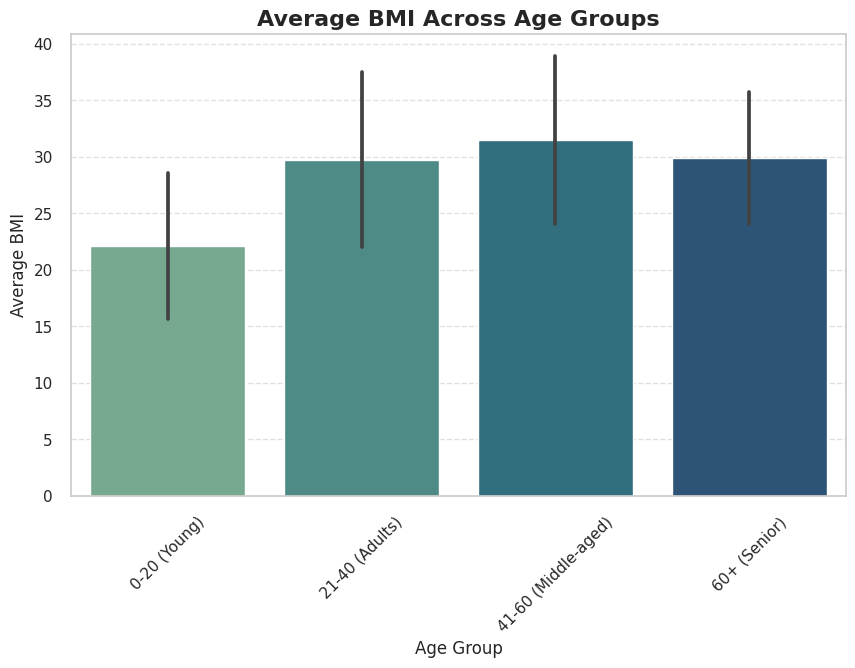

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age_Group', y='BMI', palette='crest',errorbar='sd')
plt.title('Average BMI Across Age Groups', fontsize=16, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('Average BMI Across Age Groups.png',dpi=500,bbox_inches='tight')

Middle-aged individuals (41–60) appear to be the most at-risk for high BMI.

BMI increases significantly from young to adult groups.

Seniors show lower BMI than middle-aged but remain higher than young individuals.

Error bars indicate BMI variation is highest in adults and middle-aged groups.